In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk


In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
m=pd.read_csv("SMSSpamCollection",sep="\t",names=['Label','Message'])

# Reading the data


In [5]:
m.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 43.6+ KB


In [7]:
m.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
m.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
m['Length']=m["Message"].apply(len)
m.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

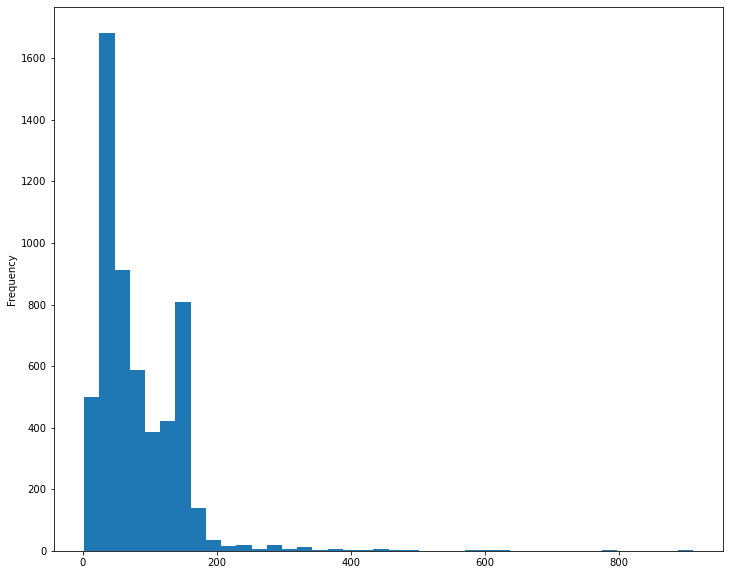

In [10]:
plt.figure(figsize=(12,10))

m['Length'].plot(kind='hist',bins=40)

In [11]:
m.Length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [12]:
m[m['Length']==2]

,Label,Message,Length
1925,ham,Ok,2
3051,ham,Ok,2
4498,ham,Ok,2
5357,ham,Ok,2


In [13]:
m[m['Length']==910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

<AxesSubplot:ylabel='Frequency'>

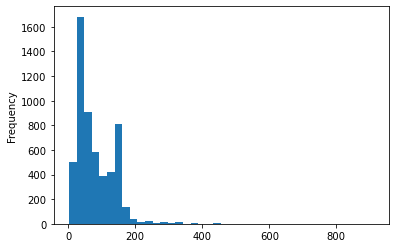

In [14]:
m['Length'].plot(kind='hist',bins=40,by='Label')


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

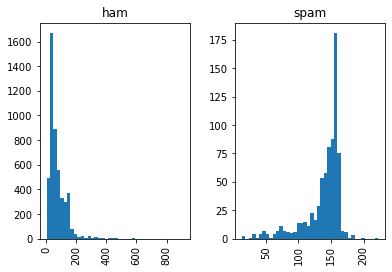

In [15]:
m.hist(column='Length',by="Label",bins=40)

# Text preprocessing


In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
nltk.corpus.stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
#sample="Hello, how are you? The weather is good today."
#nop=[]

In [19]:
#for char in sample:
   # if char not in string.punctuation:
    #    nop.append(char)

In [20]:
#nop="".join(nop)
#nop

In [21]:
#cln=[word for word in nop.split() if word.lower()not in nltk.corpus.stopwords.words('English')]

In [22]:
#cln

In [23]:
def textprocessing(mess):
    cln=[]
    #removing punctuation
    for char in mess:
        
        if char not in string.punctuation:
            cln.append(char)
            
    
    
    #join the characters back
    cln="".join(cln)
    
    
    #filtering out the stopwords and returning the clean message
    cln=[word for word in cln.split() if word.lower() not in nltk.corpus.stopwords.words('English')]
    return cln

In [24]:
textprocessing("For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..")

['love',
 'start',
 'attractioni',
 'feel',
 'need',
 'every',
 'time',
 'around',
 'meshe',
 'first',
 'thing',
 'comes',
 'thoughtsI',
 'would',
 'start',
 'day',
 'end',
 'hershe',
 'every',
 'time',
 'dreamlove',
 'every',
 'breath',
 'namemy',
 'life',
 'happen',
 'around',
 'hermy',
 'life',
 'named',
 'herI',
 'would',
 'cry',
 'herwill',
 'give',
 'happiness',
 'take',
 'sorrowsI',
 'ready',
 'fight',
 'anyone',
 'herI',
 'love',
 'craziest',
 'things',
 'herlove',
 'dont',
 'proove',
 'anyone',
 'girl',
 'beautiful',
 'lady',
 'whole',
 'planetI',
 'always',
 'singing',
 'praises',
 'herlove',
 'start',
 'making',
 'chicken',
 'curry',
 'end',
 'makiing',
 'sambarlife',
 'beautiful',
 'thenwill',
 'get',
 'every',
 'morning',
 'thank',
 'god',
 'day',
 'meI',
 'would',
 'like',
 'say',
 'lotwill',
 'tell',
 'later']

In [25]:
textprocessing('Hello how are you The weather is good today')

['Hello', 'weather', 'good', 'today']

In [26]:
m['Message'].head().apply(textprocessing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_transformer=CountVectorizer(analyzer=textprocessing).fit(m['Message'])

In [29]:
bow_transformer.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [30]:
m.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
len(bow_transformer.vocabulary_)

11425

In [32]:
m3=m['Message'][100]
m3

"Please don't text me anymore. I have nothing else to say."

In [33]:
bow3=bow_transformer.transform([m3])
print(bow3)

  (0, 3235)	1
  (0, 4701)	1
  (0, 6123)	1
  (0, 6282)	1
  (0, 8480)	1
  (0, 9554)	1
  (0, 10378)	1


In [34]:
bow3.shape

(1, 11425)

In [35]:
mbow=bow_transformer.transform(m['Message'])

In [36]:
mbow.shape

(5572, 11425)

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
tfidfTransformer =TfidfTransformer().fit(mbow)

In [39]:
tfidfTest=tfidfTransformer.transform(bow3)

In [40]:
print(tfidfTest)

  (0, 10378)	0.3095675706265973
  (0, 9554)	0.33868484123832204
  (0, 8480)	0.42924161899323643
  (0, 6282)	0.41479469177259326
  (0, 6123)	0.2804904530490831
  (0, 4701)	0.4809392033708271
  (0, 3235)	0.3509702012171666


In [41]:
tfidfTransformer.idf_[bow_transformer.vocabulary_['u']]

3.2800524267409408

In [42]:
tfidfTransformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [43]:
messagesTfidf=tfidfTransformer.transform(mbow)

In [44]:
messagesTfidf.shape

(5572, 11425)

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
sdm=MultinomialNB().fit(messagesTfidf,m['Label'])

In [47]:
sdm.predict(tfidfTest)[0]

'ham'

In [48]:
m.Label[100]

'ham'

In [49]:
allpre=sdm.predict(messagesTfidf)

In [50]:
allpre

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(m['Label'],allpre))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [53]:
from sklearn.model_selection import train_test_split

In [54]:
msg_train, msg_test, label_train, label_test = train_test_split(m['Message'], m['Label'], test_size=0.2)

In [55]:
print(len(msg_train), len(msg_test), len(label_train), len(label_test))

4457 1115 4457 1115


In [56]:

from sklearn.pipeline import Pipeline

In [57]:
pipeline = Pipeline([('bow', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())
                    ])

In [58]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [59]:
pipelinePredictions = pipeline.predict(msg_test)

In [60]:
print(classification_report(pipelinePredictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1012
        spam       0.69      1.00      0.82       103

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



In [61]:
import pickle

In [62]:
pickle.dump(pipeline,open("nlp.pkl","wb"))

In [63]:
loadedmodel=pickle.load(open("nlp.pkl","rb"))

In [64]:
loadedmodel

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [65]:
Message="ok"

In [67]:
prediction=loadedmodel.predict([Message])

In [68]:
prediction

array(['ham'], dtype='<U4')